# Notebook di analisi del dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Caratteristiche dataset prima e dopo rimozione "medicina"

In [2]:
sentinels = ['None', 'n.d.', ' ', '']

In [3]:
df = pd.read_csv('assets/out.tsv', sep='\t', na_values=sentinels)
print("df.shape: ", df.shape)

df.shape:  (102529, 30)


In [4]:
df = pd.read_csv('assets/cl_out.tsv', sep='\t', na_values=sentinels)
print("df.shape: ", df.shape)

df.shape:  (77052, 26)


In [3]:
df = pd.read_csv('assets/lab_out.tsv', sep='\t', na_values=sentinels)
print("df.shape: ", df.shape)

df.shape:  (76490, 27)


In [6]:
dup = df[df.duplicated()]
dup.shape

(0, 27)

So there are no duplicates

### Creazione file no isee&diploma

Dropout secondo criteri:  21106
Non dropout:  48912


Text(0.5, 1.0, 'Distribution of Dropout')

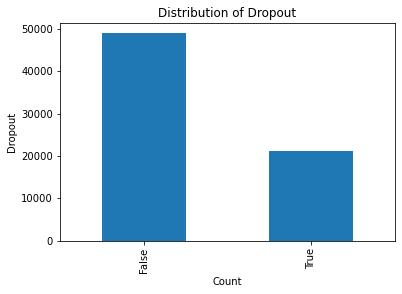

In [4]:
df = pd.read_csv('assets/yid_out.tsv', sep='\t', na_values=sentinels)
print("Dropout secondo criteri: ", sum(df.Dropout == True))
print("Non dropout: ", len(df)-sum(df.Dropout == True))

df['Dropout'].value_counts().plot(kind = 'bar')
plt.xlabel('Count')
plt.ylabel('Dropout')
plt.title('Distribution of Dropout')

In [10]:
vCols = ["votoDiploma", "valoreIntero"]
df = df.drop(vCols, axis=1)
df

,ID_Stud,annoAccaCors,annoCorso,eta,cittadinanza,codCorso,creditiTotali,facolta,flagIdentificato,luogoDiNascita,...,tipoIscrizione,tipoStudente,ultIscr,cfuPrenotati,ultPren,cfuTake,ultSup,mediaVoto,lastLogin,Dropout
0,1,2022,1,21,ITA,29390,300,ARCHITETTURA,1,MARINO (RM),...,IMMATRICOLAZIONE,2,2,8,9,56,9,27.0,253,True
1,2,2022,6,28,Extra-UE,26637,180,ECONOMIA,1,DURAZZO(ALBANIA),...,FUORI CORSO,2,1,24,1,114,8,21.0,3,False
2,4,2022,1,27,ITA,30843,120,INGEGNERIA CIVILE E INDUSTRIALE,0,ROMA (RM),...,IMMATRICOLAZIONE,2,1,9,0,0,12,0.0,7,False
3,6,2022,1,23,ITA,31292,120,"SCIENZE POLITICHE, SOCIOLOGIA, COMUNICAZIONE",1,ROMA (RM),...,IMMATRICOLAZIONE,2,1,18,1,33,4,27.0,7,False
4,7,2021,2,28,ITA,15918,180,INGEGNERIA CIVILE E INDUSTRIALE,1,ROMA (RM),...,FUORI CORSO,2,2,9,17,177,17,22.0,365,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70026,102519,2022,2,25,ITA,28700,120,"SCIENZE MATEMATICHE, FISICHE E NATURALI",1,ROMA (RM),...,IN CORSO,2,2,6,11,75,11,30.0,323,True
70027,102521,2021,2,25,ITA,28706,180,"SCIENZE POLITICHE, SOCIOLOGIA, COMUNICAZIONE",1,ROMA (RM),...,FUORI CORSO,2,2,0,6,125,23,23.0,365,True
70028,102522,2022,1,35,ITA,30542,60,FARMACIA E MEDICINA,1,ROMA (RM),...,IMMATRICOLAZIONE,1,1,0,6,0,12,0.0,53,False
70029,102524,2022,1,21,ITA,29867,180,Interfacolta tra FARMACIA E MEDICINA - MEDICIN...,0,PIEDIMONTE MATESE (CE),...,IMMATRICOLAZIONE,2,1,0,6,0,12,0.0,125,False


In [11]:
df.to_csv('assets/nid_out.tsv', index = False, sep='\t')

### Analisi della correlazione tra date e Dropout

In [12]:
sentinels = ['None', 'n.d.', ' ', '']
df = pd.read_csv('assets/yid_out.tsv', sep='\t', na_values=sentinels)
# print("df.shape: ", df.shape)

df.mediaVoto.fillna(df.mediaVoto.mean(), inplace=True)
df = df.drop(['luogoDiNascita', 'nazioneNascita'], axis=1)
# print(pd.isnull(df).sum() > 0)

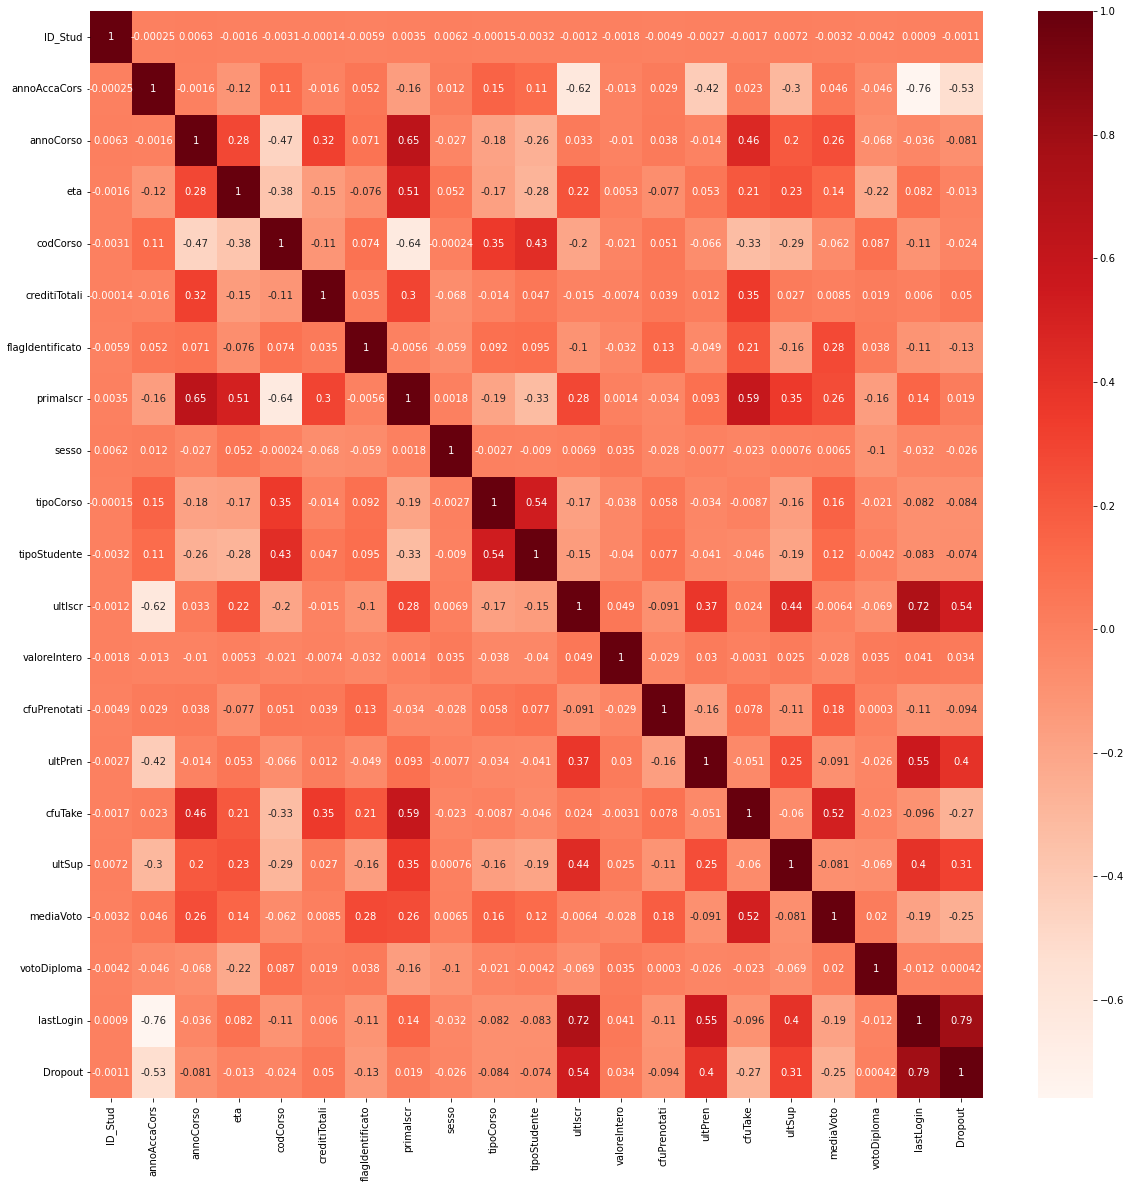

In [13]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "Reds")

In [14]:
df.columns

Index(['ID_Stud', 'annoAccaCors', 'annoCorso', 'eta', 'cittadinanza',
       'codCorso', 'creditiTotali', 'facolta', 'flagIdentificato', 'primaIscr',
       'sesso', 'tipoCorso', 'tipoIscrizione', 'tipoStudente', 'ultIscr',
       'valoreIntero', 'cfuPrenotati', 'ultPren', 'cfuTake', 'ultSup',
       'mediaVoto', 'votoDiploma', 'lastLogin', 'Dropout'],
      dtype='object')